### Diwali Sales Data Analysis

In [10]:
# importing all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [36]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = 'latin1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### Data cleaning


In [37]:
df = df.drop(['Status','unnamed1'],axis =1)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [38]:
df.shape

(11251, 13)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [52]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [23]:
df['Amount'].isnull().sum()/len(df.index)

0.0010665718602790863

In [53]:
df.dropna(inplace = True)

In [54]:
df.shape

(11239, 13)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [56]:
df['Amount'] = df['Amount'].astype('int')


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [58]:
df.rename(columns = {"Marital_Status":"Shadi"},inplace = True)

In [59]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [60]:
df.describe()

,User_ID,Age,Shadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


### EDA(Exploratory Data Analysis)

In [61]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


[]

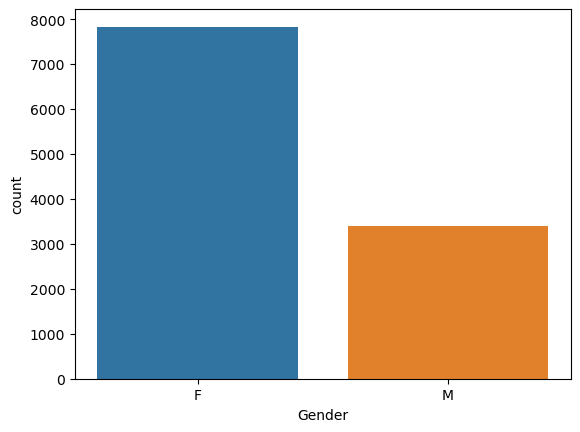

In [62]:
sns.countplot(x = 'Gender', data = df)
plt.plot()

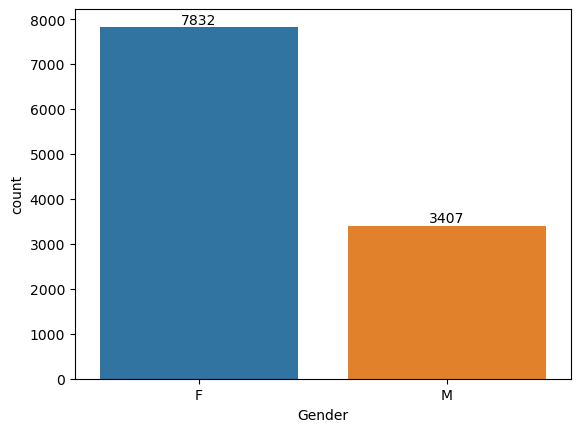

In [63]:
ax = sns.countplot(x='Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
    

#### from the above we can say that female purchasing power is more than men.

### Age 

[]

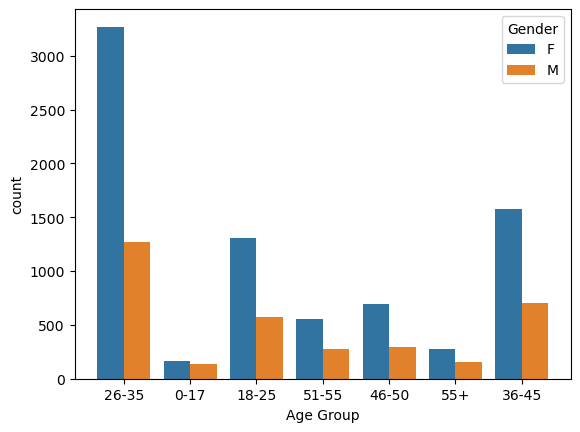

In [66]:
sns.countplot(x='Age Group',data = df, hue = 'Gender')
plt.plot()

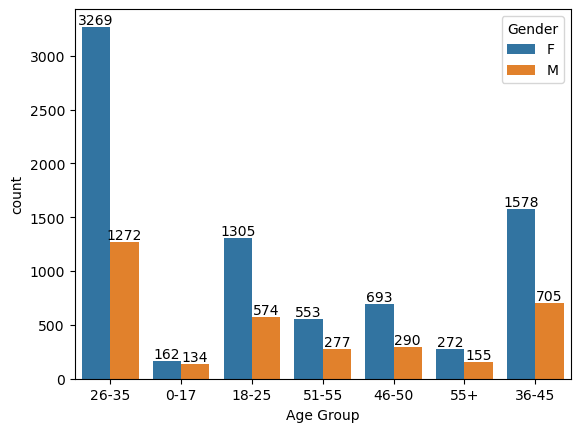

In [68]:
ax = sns.countplot(data = df, x= 'Age Group',hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

####  total amount vs age_group

<Axes: xlabel='Age Group', ylabel='Amount'>

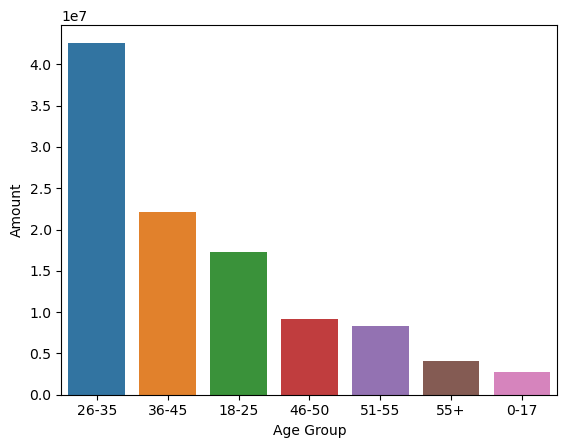

In [78]:
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by ='Amount', ascending = False)

sns.barplot(x = 'Age Group',y = "Amount", data = sales_age)

#### From the above graph we can say 26-35 age group females have purhcased more

### State

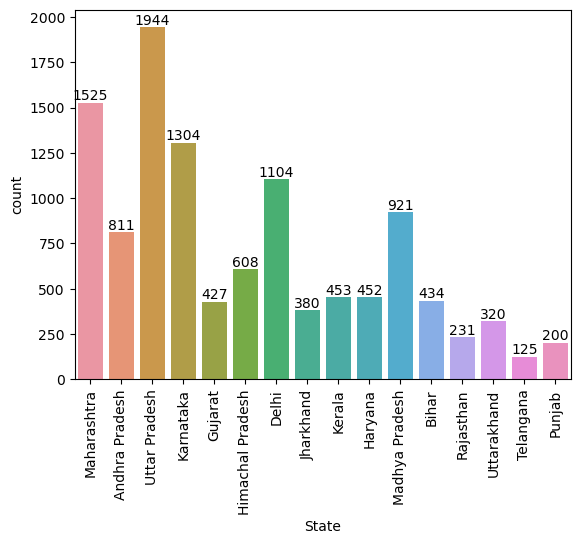

In [77]:
ax = sns.countplot(data = df, x = 'State')
plt.xticks(rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='State', ylabel='Orders'>

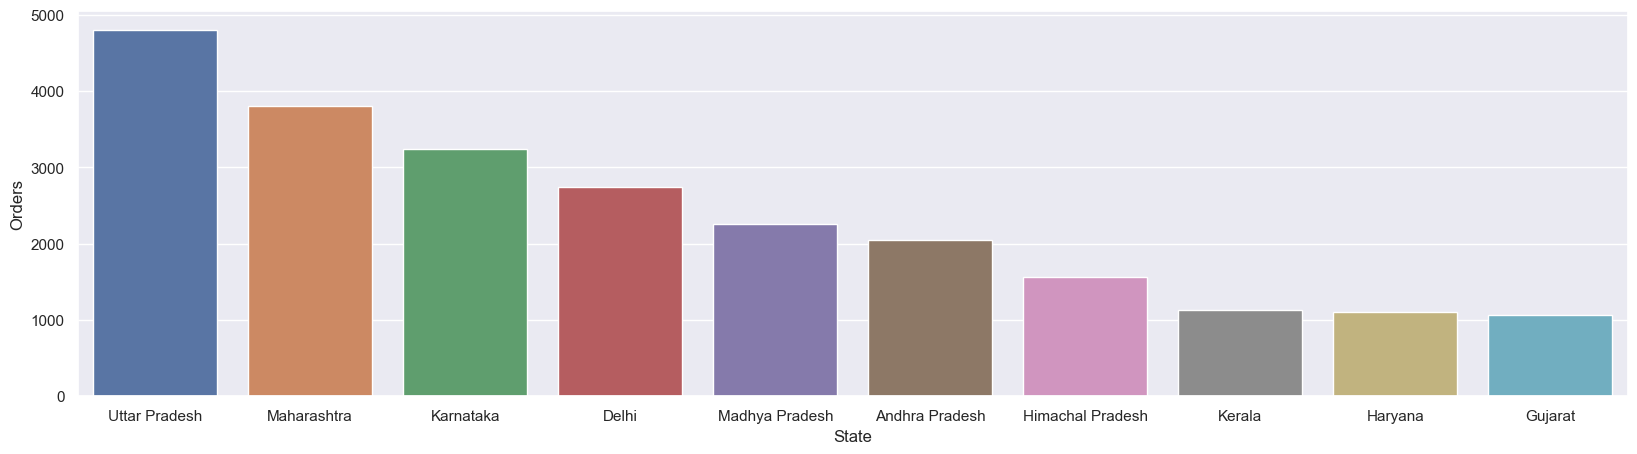

In [87]:
state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)

#plt.xticks(rotation = 90)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = state, x = 'State' , y ='Orders')

#### From the above graph we can say that most of the orders are from uttar pradesh and maharashtra 

### Marital status

In [89]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

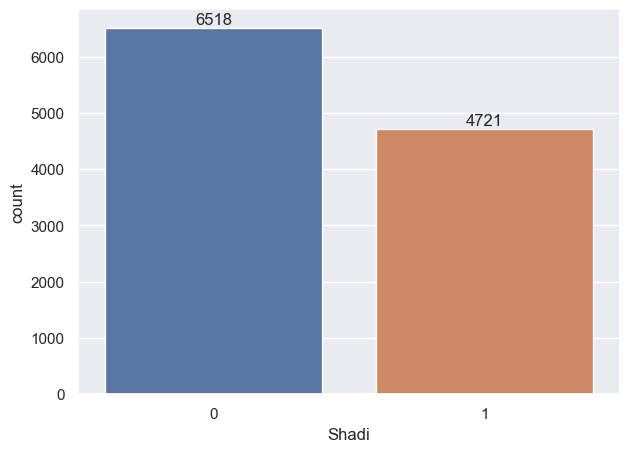

In [97]:
ax = sns.countplot(data = df,x='Shadi')

sns.set(rc ={'figure.figsize':(5,7)} )

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Shadi', ylabel='Amount'>

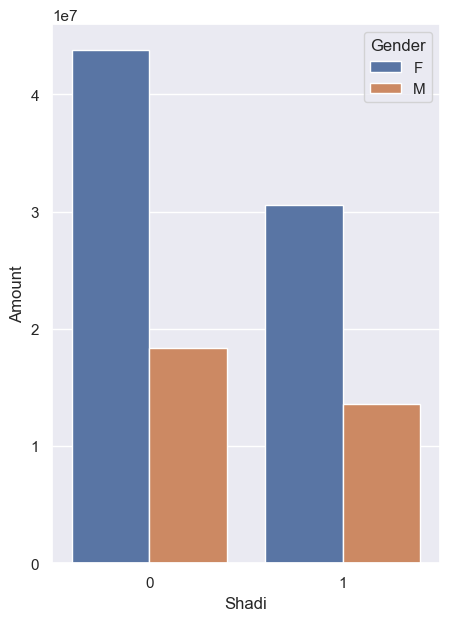

In [98]:
status = df.groupby(['Shadi','Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)
sns.barplot(data = status, x = 'Shadi',y= 'Amount',hue = 'Gender')

#### From the above graphs we can see that most of the buyers are married(women) and they have high purchasing power

In [99]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

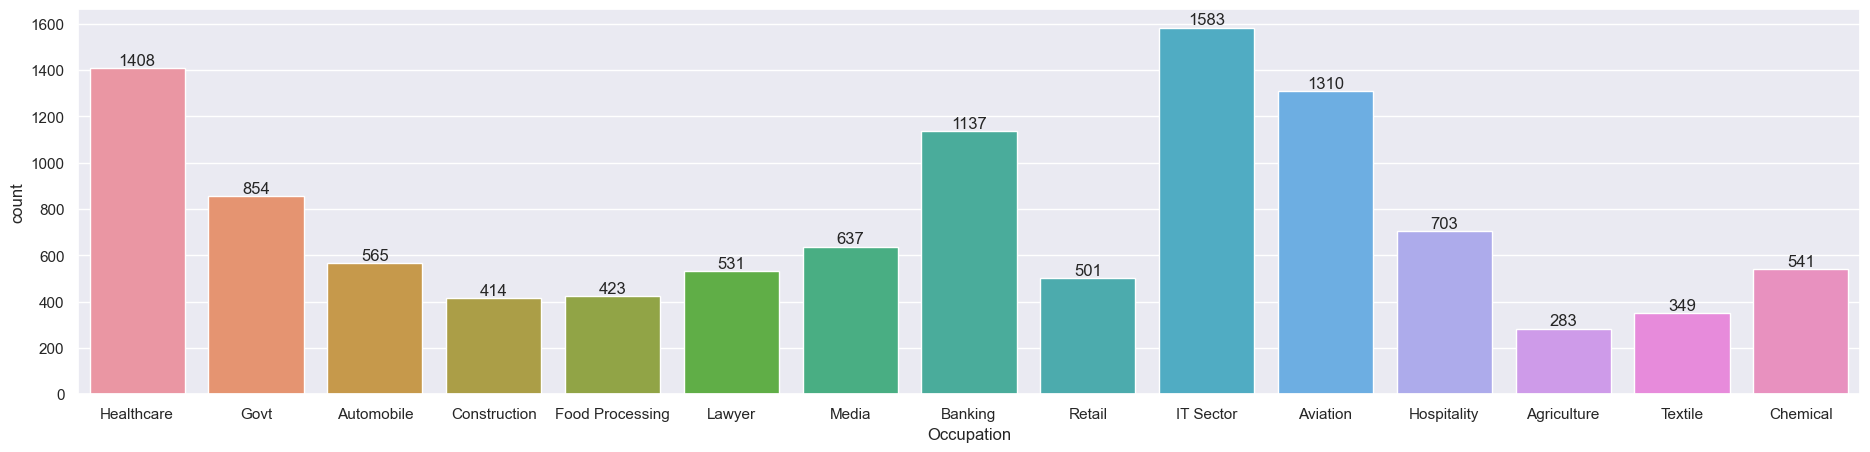

In [105]:
ax = sns.countplot(data = df, x = 'Occupation')
sns.set(rc={'figure.figsize':(22,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

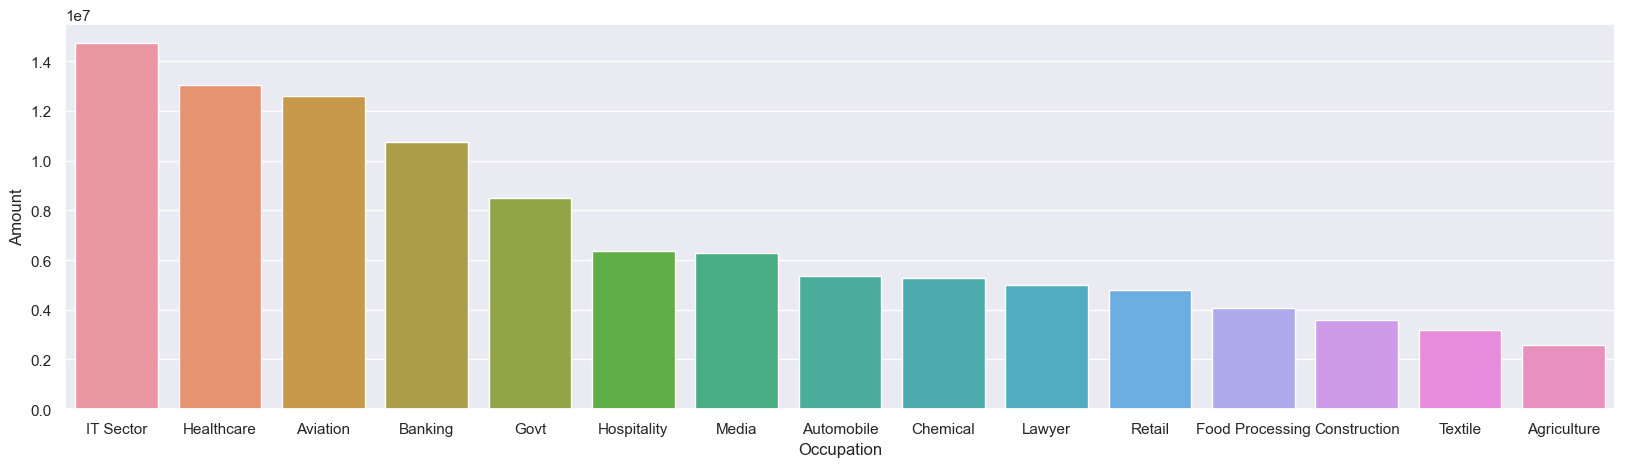

In [108]:
occupation = df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(data = occupation, x = 'Occupation',y='Amount')



#### We can say that most of the buyers are working in IT sector and Healthcare